In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
print(sns.__version__)

0.11.1


In [3]:
# Palette
colores={"naranja":"#ff7f0e","verde":"#2ca02c","azul":"#1f77b4"}
paleta={"nsl-kdd":colores["verde"],"unsw-nb15":colores["naranja"],"ugr16":colores["azul"]}

# fondict for axis labels
font_labels = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}
# fondict for title labels
font_title = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 24}
# fontsize for tickso
ticks_fontsize=20

# legend fontsize
legend_fontsize=15

# img path
img_path = "./img/"

# Linewidth and markersize
lw=5
ms=100
marcadores={"nsl-kdd":"v","unsw-nb15":"o","ugr16":"X"}

In [4]:
data_path='data/neris_dl_data/'

In [5]:
# Homogenizacion de cabecera
# raw
# header =['te', 'td', 'sa', 'da', 'sp', 'dp', 'pr', 'flg', 'fwd', 'stos', 'pkt', 'byt', 'label'
# comun
header =['td', 'sa', 'da', 'sp', 'dp', 'pr', 'flg', 'fwd', 'stos', 'pkt', 'byt']

In [6]:
# Trazas de Neris generadas con la VAE (test)
neris_generated = pd.read_csv(data_path + 'generated_test.csv')
# Trazas de Neris raw (test)
neris_raw = pd.read_csv(data_path + 'unprocessed_test.csv', usecols=header)

In [42]:
neris_raw['sa']

0        42.219.154.70
1         143.72.8.137
2         143.72.8.137
3         143.72.8.137
4         143.72.8.137
             ...      
67255    42.219.154.68
67256     143.72.8.137
67257    42.219.154.68
67258     143.72.8.137
67259    42.219.154.68
Name: sa, Length: 67260, dtype: object

In [7]:
# Homogenizacion de cabecera
neris_generated.columns = header
neris_generated.dtypes

td        int64
sa       object
da       object
sp        int64
dp        int64
pr       object
flg      object
fwd       int64
stos      int64
pkt     float64
byt     float64
dtype: object

In [8]:
neris_raw.shape

(67260, 11)

### Análisis de variables númericas


In [9]:
var_n =['sp','dp','fwd', 'stos', 'pkt', 'byt']
neris_generated_n = neris_generated[var_n]
neris_generated_n['sample_type']=["generated" for tag in range(neris_generated_n.shape[0])]

<ipython-input-9-dd48caeaed64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neris_generated_n['sample_type']=["generated" for tag in range(neris_generated_n.shape[0])]


In [10]:
neris_raw_n = neris_raw[var_n]
neris_raw_n['sample_type']=["raw" for tag in range(neris_raw.shape[0])]

<ipython-input-10-8025ed3aeb41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neris_raw_n['sample_type']=["raw" for tag in range(neris_raw.shape[0])]


In [28]:
neris_raw.da.value_counts()

143.72.8.137     19052
42.219.154.71     1739
209.85.225.27     1707
42.219.158.21     1564
212.117.174.7     1474
                 ...  
89.108.124.71        2
92.243.94.228        2
188.190.97.32        2
188.40.84.18         2
217.10.32.5          2
Name: da, Length: 1092, dtype: int64

In [11]:
neris_n = pd.concat([neris_generated_n, neris_raw_n])
neris_n.sample_type.value_counts()

raw          67260
generated    67200
Name: sample_type, dtype: int64

In [12]:
neris_n.head()

sp  dp  fwd  stos  pkt   byt sample_type
0  53  16    0     0  0.0  84.0   generated
1  53  17    0     0  0.0   0.0   generated
2  53  49    0     0  0.0   0.0   generated
3  53  29    0     0  0.0   0.0   generated
4  53  21    0     0  0.0   0.0   generated

In [13]:
neris_n[(neris_n['sp'] > 0) & (neris_n['sp'] <= 150)]['sample_type'].value_counts()

generated    67194
raw          23923
Name: sample_type, dtype: int64

#### Source Port

<AxesSubplot:xlabel='sp', ylabel='Count'>

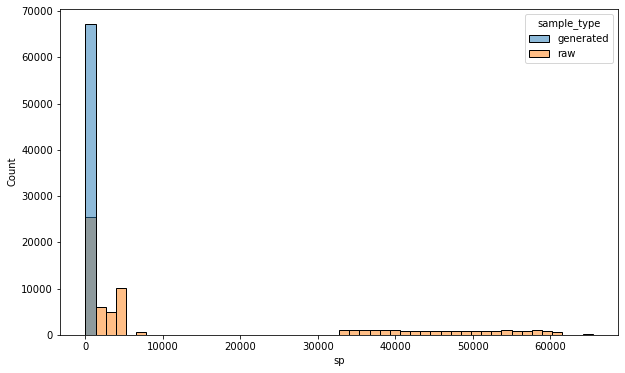

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data=neris_n, x="sp", hue='sample_type', ax=ax1, bins=50)


#ax1.set_xlabel("PC1 ({0:.2f} %)".format(pca_model.explained_variance_ratio_[0]*100), fontdict=font_labels)
#ax1.set_ylabel("PC2 ({0:.2f} %)".format(pca_model.explained_variance_ratio_[1]*100), fontdict=font_labels)
#plt.xticks(fontsize=ticks_fontsize)
#plt.yticks(fontsize=ticks_fontsize)
#plt.xticks(rotation=25)
#plt.tight_layout()
#plt.legend(fontsize=legend_fontsize,markerscale=1.5)
#plt.savefig(img_path +"pca_zoom_background_20000.pdf",orientation='portrait')
#plt.ylim(0,2000)
#plt.xlim(0,1000)


#### Destination port

<AxesSubplot:xlabel='dp', ylabel='Count'>

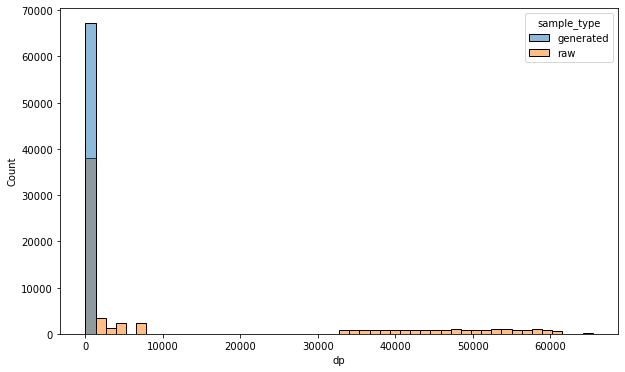

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data=neris_n, x="dp", hue='sample_type', ax=ax1, bins=50)
#neris_n[neris_n.sample_type=='generated']['dp'].hist(bins=50)



#ax1.set_xlabel("PC1 ({0:.2f} %)".format(pca_model.explained_variance_ratio_[0]*100), fontdict=font_labels)
#ax1.set_ylabel("PC2 ({0:.2f} %)".format(pca_model.explained_variance_ratio_[1]*100), fontdict=font_labels)
#plt.xticks(fontsize=ticks_fontsize)
#plt.yticks(fontsize=ticks_fontsize)
#plt.xticks(rotation=25)
#plt.tight_layout()
#plt.legend(fontsize=legend_fontsize,markerscale=1.5)
#plt.savefig(img_path +"pca_zoom_background_20000.pdf",orientation='portrait')
#plt.ylim(0,2000)
#plt.xlim(0,1000)


#### Packets

(0.0, 50.0)

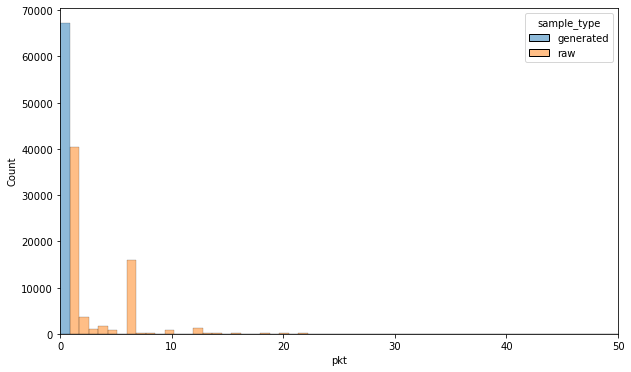

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data=neris_n, x="pkt", hue='sample_type', ax=ax1, bins=300)
plt.xlim(0,50)
#neris_n[neris_n.sample_type=='generated']['byt'].hist(bins=50)

#### Bytes

(0.0, 2000.0)

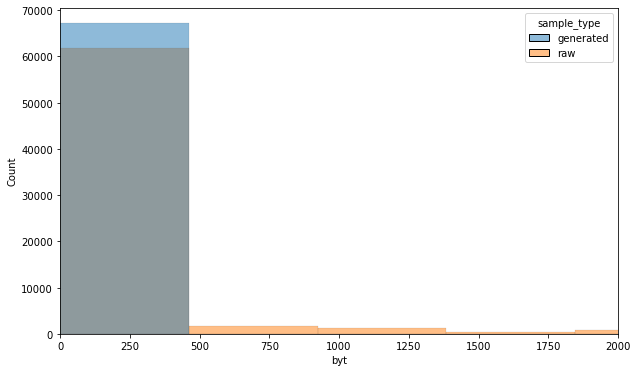

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(data=neris_n, x="byt", hue='sample_type', ax=ax1, bins=700)
plt.xlim(0,2000)
#neris_n[neris_n.sample_type=='generated']['byt'].hist(bins=50)

In [105]:
neris_n[neris_n.sample_type=='generated']['byt'].value_counts()

0.0     66706
84.0      494
Name: byt, dtype: int64

In [164]:
neris_n[neris_n.sample_type=='raw']['byt'].value_counts()

86.0      18771
70.0      18717
288.0     15726
192.0       923
1260.0      600
          ...  
844.0         1
36.0          1
32.0          1
31.0          1
51.0          1
Name: byt, Length: 485, dtype: int64

In [98]:
neris_n[neris_n.sample_type=='generated']['pkt'].value_counts()

0.0    67200
Name: pkt, dtype: int64

### IP Analysis

In [182]:
# IP analisis
neris_generated.sa.value_counts()

42.219.152.1     28800
42.219.152.17    16361
42.219.152.9     12568
42.219.152.25     5951
46.219.152.1       896
42.219.152.5       753
46.90.136.1        662
42.219.152.13      464
46.91.136.1        234
42.219.152.21      230
42.219.152.29      182
42.219.152.11       48
42.219.152.27       22
42.219.152.3        17
42.219.152.7         6
42.219.152.19        4
42.219.152.15        1
10.219.152.25        1
Name: sa, dtype: int64

In [183]:
neris_generated.da.value_counts()

10.219.152.9     24137
10.217.152.9      8446
10.91.152.9       5819
10.219.136.9      5132
10.89.152.9       3259
                 ...  
11.217.152.13        1
138.218.136.9        1
10.217.24.0          1
15.217.152.9         1
174.216.152.1        1
Name: da, Length: 481, dtype: int64

### Connectivity evaluation

#### Gephi ready

In [36]:
# Nodes 
# RAW dataset
sa_da = set(pd.concat([neris_raw['sa'],neris_raw['da']]))
df_nodes = pd.DataFrame(sa_da,columns=["Label"])
df_nodes.to_csv(data_path + "neris_raw_nodes.csv",index_label='id')


In [39]:
df_nodes

Label
0       83.17.186.77
1      94.236.95.170
2       84.116.5.197
3      78.24.218.162
4       44.127.87.87
...              ...
1569    89.188.105.6
1570  60.249.196.250
1571   57.100.105.25
1572   66.43.210.221
1573  190.76.248.192

[1574 rows x 1 columns]

In [38]:
id_label = df_nodes.to_dict()['Label']
label_id = {y:x for x,y in id_label.items()}
label_id

{'83.17.186.77': 0,
 '94.236.95.170': 1,
 '84.116.5.197': 2,
 '78.24.218.162': 3,
 '44.127.87.87': 4,
 '195.113.232.89': 5,
 '209.236.119.101': 6,
 '209.190.61.34': 7,
 '70.67.173.249': 8,
 '64.202.126.109': 9,
 '79.137.226.103': 10,
 '42.219.158.18': 11,
 '238.181.228.182': 12,
 '74.125.244.10': 13,
 '232.48.214.96': 14,
 '95.58.159.249': 15,
 '212.32.224.32': 16,
 '80.12.242.142': 17,
 '184.106.213.57': 18,
 '217.231.240.114': 19,
 '165.225.21.124': 20,
 '195.50.106.142': 21,
 '246.7.145.80': 22,
 '174.224.65.124': 23,
 '237.113.128.4': 24,
 '200.143.43.236': 25,
 '73.87.94.131': 26,
 '237.111.11.47': 27,
 '62.109.189.240': 28,
 '212.117.167.100': 29,
 '221.226.242.228': 30,
 '94.248.9.208': 31,
 '232.100.41.68': 32,
 '77.238.175.247': 33,
 '77.243.96.10': 34,
 '188.40.54.222': 35,
 '124.123.78.67': 36,
 '61.6.38.139': 37,
 '68.236.174.86': 38,
 '74.223.140.111': 39,
 '64.236.79.229': 40,
 '178.107.193.75': 41,
 '204.211.252.146': 42,
 '78.249.161.87': 43,
 '91.121.49.79': 44,
 '164.

In [45]:
neris_raw_gephi

td    sa    da     sp     dp   pr     flg  fwd  stos  pkt  byt
0      0.0  1536   424  45659     53  UDP  .A....    0     0    1   70
1      0.0   424   779     53  38673  UDP  .A....    0     0    1   86
2      0.0   424   279     53  45642  UDP  .A....    0     0    1   86
3      0.0   424  1385     53  35099  UDP  .A....    0     0    1   86
4      0.0   424  1331     53  36305  UDP  .A....    0     0    1   86
...    ...   ...   ...    ...    ...  ...     ...  ...   ...  ...  ...
67255  0.0   279   424  57008     53  UDP  .A....    0     0    1   70
67256  0.0   424   279     53  57008  UDP  .A....    0     0    1   86
67257  0.0   279   424  38462     53  UDP  .A....    0     0    1   70
67258  0.0   424   279     53  38462  UDP  .A....    0     0    1   86
67259  0.0   279   424  36116     53  UDP  .A....    0     0    1   70

[67260 rows x 11 columns]

In [44]:
# Edges 
# RAW dataset

neris_raw_gephi = neris_raw.copy()
neris_raw_gephi['sa'] = neris_raw_gephi['sa'].map(label_id)
neris_raw_gephi['da'] = neris_raw_gephi['da'].map(label_id)

df_edges = neris_raw_gephi[['sa','da']]
df_edges = df_edges.rename(columns={'sa':'Source','da':'Target'})

df_edges.to_csv(data_path + "neris_raw_edges.csv",index_label='Label')
df_edges

Source  Target
0        1536     424
1         424     779
2         424     279
3         424    1385
4         424    1331
...       ...     ...
67255     279     424
67256     424     279
67257     279     424
67258     424     279
67259     279     424

[67260 rows x 2 columns]

In [197]:
# Nodes 
# Generated dataset
sa_da = set(pd.concat([neris_generated['sa'],neris_generated['da']]))
df_nodes = pd.DataFrame(sa_da,columns=["Label"])
df_nodes.to_csv(data_path + "neris_generated_nodes.csv",index_label='id')


In [198]:
id_label = df_nodes.to_dict()['Label']
label_id = {y:x for x,y in id_label.items()}
len(label_id)

492

In [199]:
# Edges 
# Generated dataset

neris_generated_gephi = neris_generated.copy()
neris_generated_gephi['sa'] = neris_generated_gephi['sa'].map(label_id)
neris_generated_gephi['da'] = neris_generated_gephi['da'].map(label_id)

df_edges = neris_generated_gephi[['sa','da']]
df_edges = df_edges.rename(columns={'sa':'Source','da':'Target'})

df_edges.to_csv(data_path + "neris_generated_edges.csv",index_label='Label')
df_edges

Source  Target
0          39     378
1         105     225
2         150     110
3          89     437
4          89     253
...       ...     ...
67195      77     469
67196      77     469
67197      77     469
67198      77     469
67199     152     469

[67200 rows x 2 columns]

#### Experimental 

In [114]:
# From https://dmuhs.blog/2018/09/14/visualizing-ip-connections-in-python/
import networkx as nx
%matplotlib inline

In [115]:
neris_raw['sa'].values

array(['42.219.154.70', '143.72.8.137', '143.72.8.137', ...,
       '42.219.154.68', '143.72.8.137', '42.219.154.68'], dtype=object)

In [117]:
G = nx.DiGraph()
connections = set()
nodes = set()

In [118]:
G.add_nodes_from(set(neris_raw['sa'].values))# source IP
G.add_nodes_from(set(neris_raw['da'].values))# destination IP

In [119]:
# (src,dst)
#edges = [(botnet.iloc[i,2],botnet_graph.iloc[i,3]) for i in range(botnet_graph.shape[0])]
edges = list(zip(neris_raw['sa'].values,neris_raw['da'].values))
G.add_edges_from(set(edges))

In [120]:
len(set(edges))

13076

In [121]:
pos = nx.spring_layout(G, scale=1.0, iterations=100)
fig, ax = plt.subplots(figsize=(15,15))
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)

Error in callback <function flush_figures at 0x7f89fc9d6700> (for post_execute):


KeyboardInterrupt: 

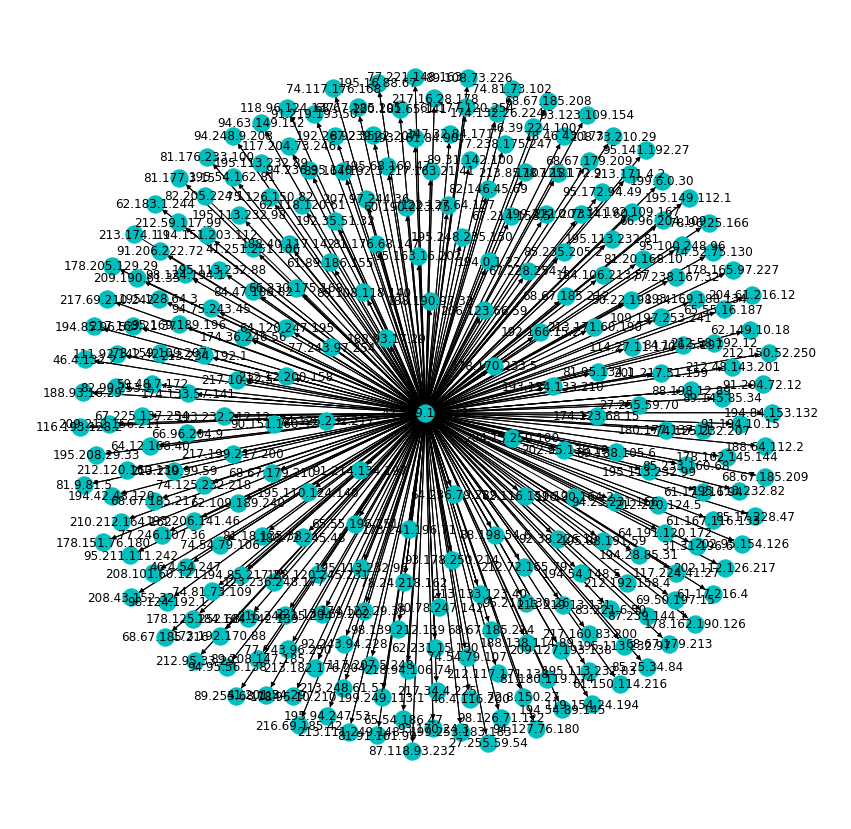

In [67]:
G.remove_node('77.243.97.250')
G.remove_node('85.172.8.54')
G.remove_node('212.248.42.90')
pos = nx.spring_layout(G, scale=1.0, iterations=100)
fig, ax = plt.subplots(figsize=(15,15))
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)